In [208]:
# 고양이 수염 스티커 붙이기

# 순서
# 1. 얼굴 이미지 준비하기
# 1-1. 얼굴 이미지 읽어오기, 리사이즈, 색 보정
# 2. 얼굴 검출
# 3. 좌표를 이용하여 랜드마크 생성
# 4. 스티커 사이즈 조절
# 5. 스티커 적용

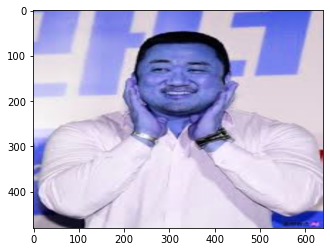

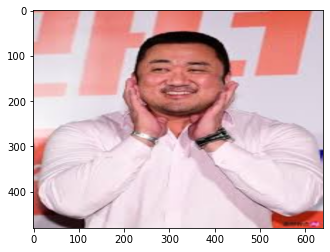

In [209]:
# 사용할 패키지 가져오기
# 얼굴 인식을 위한 opencv, opencv 데이터를 읽기 위한 numpy, 사진출력을 위한 matplotlib, 얼굴 감지를 위한 dlib 가져오기
import cv2
import matplotlib.pyplot as plt
import numpy as np


# 얼굴 이미지 준비하기
import os

# 얼굴 이미지 경로
my_img_path = os.getenv("HOME") +'/camera_sticker/images/image3.jpg'


# opencv로 이미지 읽어오기
img_bgr = cv2.imread(my_img_path)
#print(image_bgr)

# 640*480 으로 resize
img_bgr = cv2.resize(img_bgr, (640, 480))

# 출력 이미지 카피
img_show = img_bgr.copy()

# 이미지 출력
plt.imshow(img_bgr)
plt.show()

# 색 보정처리
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 보정된 이미리 출력
plt.imshow(img_rgb)
plt.show()

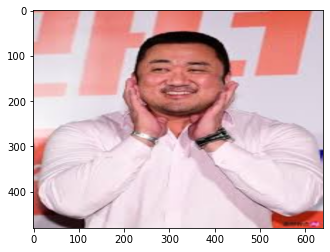

IndexError: list index out of range

In [210]:
# 얼굴 검출
# 얼굴 검출을 위한 dlib 라이브러리 가져오기
import dlib

# detector_hog 변수에 기능 저장
detector_hog = dlib.get_frontal_face_detector()

# dlib_rects 변수에 detector_hog 에서 차즌 이미지 좌표 저장
dlib_rects = detector_hog(img_rgb, 1)
#print(dlib_rects)

# 녹색 테두리로 감지된 얼굴 출력
for dlib_rect in dlib_rects :
    # dlib_rects 에 저장된 detector_hog 로 찾은 좌표를 dlib_rect 로 저장
    # l, t, r, b 좌표를 각각 저장
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


# 랜드마크를 포인트 찾기

# 랜드마크 모델 가져오기
model_path = os.getenv("HOME") + '/camera_sticker/models/shape_predictor_68_face_landmarks.dat'

# 가져온 모델을 landmark_predictor 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)

# 빈리스트 생성
list_landmarks= []


for dlib_rect in dlib_rects :
    points = landmark_predictor(img_rgb, dlib_rect)
    
    list_points = list(map(lambda p : (p.x, p.y), points.parts()))
    
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

In [ ]:
# 랜드마크 출력
for landmark in list_landmarks :
    for idx, point in enumerate(list_points) : 
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
# 스티커 적용을 위한 좌표확인

for dlib_rect, landmakr in zip(dlib_rects, list_landmarks) : 
    
    # 코 중심위치 확인
    print(landmark[33])
    
    x = landmark[3][0] - dlib_rect.width() // 15
    y = landmark[33][1] - dlib_rect.width() // 2
    
    # 스티커 크기
    w = dlib_rect.width()
    h = dlib_rect.width()
    
    print('(x, y) : (%d, %d)' %(x, y))
    print('(w, h) : (%d, %d)' %(w, h))
    
    
# 스티커 이미지 경로 읽어오기
sticker_path = os.getenv("HOME") + '/camera_sticker/images/cat_whiskers.png'

# 스티커 이미지 불러오기
img_sticker = cv2.imread(sticker_path)

# 스티커 resize 하기
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

In [ ]:
sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker == 255,sticker_area,img_sticker).astype(np.uint8)

# 스티커 적용한 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 최종 결과
sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker == 255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 회고

1. 스티커 사진 위치를 옮기는 과정에서 정말 많은 애를 먹었다...
2. 이해가 안갔는데 모든 좌표를 하나씩 건들여보며 시도해본 결과 위치를 조정하는데 성공했지만, 
   sticker_area 부분에서 왜 x 와 값을 스티커 쉐입에 더해줘야하는지 잘 모르겠다.
3. 그리고 다른 사진으진, 다른 각도로 해 보았을때 얼굴을 감지하지 못했다.
   턱받침을 하고 있는 사진이었는데 손 위치 때문에 얼굴 윤곽을 정확히 감지하지 못했나 싶다.
4. 그리고 너무 어렵다 ....